In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import pandas as pd
import cv2

import imageio
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Q19. Given the baboon image, apply a denonising filter and implement the
Harris corner, display the corners using figure. Ensure that invalid points are
removed. Write the structure matrix and explain the steps briefly in your
own words with supporting equations.

In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Digital-Image-Processing/blob/main/baboon.tiff?raw=true

--2022-05-03 05:22:12--  https://github.com/Dinesh-Adhithya-H/Digital-Image-Processing/blob/main/baboon.tiff?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/Digital-Image-Processing/raw/main/baboon.tiff [following]
--2022-05-03 05:22:12--  https://github.com/Dinesh-Adhithya-H/Digital-Image-Processing/raw/main/baboon.tiff
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Digital-Image-Processing/main/baboon.tiff [following]
--2022-05-03 05:22:13--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Digital-Image-Processing/main/baboon.tiff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.

In [ ]:
img=plt.imread("baboon.tiff?raw=true")

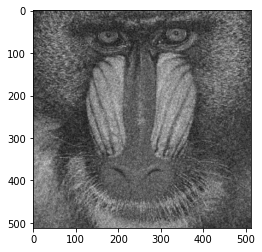

In [ ]:
plt.imshow(img,cmap="gray")

In [ ]:
img_blur=cv2.GaussianBlur(img, (5,5), 10)

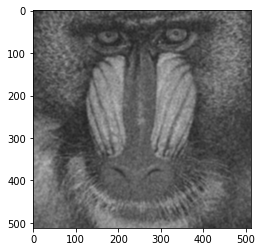

In [ ]:
plt.imshow(img_blur,cmap="gray")

In [ ]:
img = cv2.imread("baboon.tiff?raw=true")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.1*dst.max()]=[0,0,255]

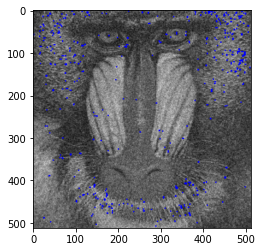

In [ ]:
plt.imshow(img) # corner shown in blue.

# Q21. In the given binary image (binaryshapes.png), compute the bounding
box, and centroid of each object and show the results as a figure.

In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/Digital-Image-Processing/raw/main/binaryshapes_ensem.png

--2022-05-03 05:40:27--  https://github.com/Dinesh-Adhithya-H/Digital-Image-Processing/raw/main/binaryshapes_ensem.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/Digital-Image-Processing/main/binaryshapes_ensem.png [following]
--2022-05-03 05:40:27--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Digital-Image-Processing/main/binaryshapes_ensem.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7181 (7.0K) [image/png]
Saving to: ‘binaryshapes_ensem.png’

binaryshapes_ensem. 100%[===================>]   7.01K  --.-KB/s    in 0s      

2022-05-03 05:40:28 (64.6 MB/s) 

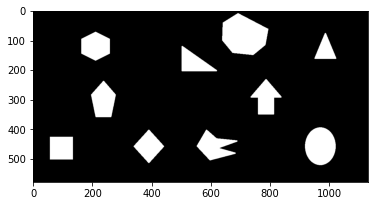

In [ ]:
img=cv2.imread("binaryshapes_ensem.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")

In [ ]:
contours, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
img_contour=cv2.imread("binaryshapes_ensem.png")

In [ ]:
for cnt in contours:
    (x,y), (minorAxisLength, majorAxisLength), angle = cv2.fitEllipse(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_contour,(x, y),(x+w, y+h),(0,255,0),2,0)

    M = cv2.moments(cnt)

    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    print("center:",cx,cy)


center: 95 463
center: 611 457
center: 391 457
center: 970 456
center: 237 303
center: 787 294
center: 543 174
center: 987 130
center: 211 118
center: 712 81


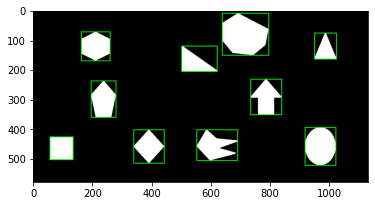

In [ ]:
plt.imshow(img_contour,cmap="gray")

# 16. compute homography

In [ ]:
src_pts = np.float32([[5,4],[7,4],[7,5],[6,6]]).reshape(-1,1,2)
dst_pts = np.float32([[0,0],[1,0],[1,1],[0,1] ]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, 1)

In [ ]:
matchesMask = mask.ravel().tolist()

In [ ]:
matchesMask

[1, 1, 1, 1]

In [ ]:
M # homphgraphy computation

array([[ 5.55555556e-02, -2.77777778e-02, -1.66666667e-01],
       [-2.36548096e-17,  8.33333333e-02, -3.33333333e-01],
       [-1.11111111e-01, -2.77777778e-02,  1.00000000e+00]])

# 17

In [ ]:
ptsLeft = np.float32([[533,140],[1047,570],[2033,481.8],[139.7,1639.8],[1555.2,2021.5],[927.1,2869],[557.5,3346.8],[1991.0,3184.6]])
ptsRight = np.float32([[650.6,524.9],[1008.2,795.4],[1849.7,1080.9],[235.9,1730],[1510.1,2012.5],[933.1,2784.9],[671.7,3169.5],[1858.7,2938.1]])
F, mask = cv2.findFundamentalMat(ptsLeft,
                                 ptsRight,
                                 cv2.FM_LMEDS)
  
# We select only inlier points
ptsLeft = ptsLeft[mask.ravel() == 1]
ptsRight = ptsRight[mask.ravel() == 1]

In [ ]:
ptsLeft

array([[1047. ,  570. ],
       [2033. ,  481.8],
       [ 139.7, 1639.8],
       [1555.2, 2021.5],
       [ 927.1, 2869. ],
       [ 557.5, 3346.8],
       [1991. , 3184.6]], dtype=float32)

In [ ]:
ptsRight.shape

(7, 2)

In [ ]:
F # Fundamental matrix

array([[-3.51528356e-07, -2.66392397e-06,  1.42357321e-02],
       [ 3.53690174e-06,  1.63468952e-07, -2.62411937e-03],
       [-1.43722892e-02,  1.16651657e-03,  1.00000000e+00]])

In [ ]:
linesRight = cv2.computeCorrespondEpilines(ptsLeft.reshape(-1, 1, 2), 
                                           1, F)
linesRight = linesRight.reshape(-1, 3)

# 18

In [ ]:
F=np.array([[-0.00310695, -0.0025646, 2.96584],
            [-0.028094 ,-0.00771621, 56.3813],
            [13.1905, -29.2007 ,-9999.79]])

x=np.array([[343.53,221.70]]).reshape(1,2)

In [ ]:
lines= cv2.computeCorrespondEpilines(x.reshape(-1,1,2),1, F)

In [ ]:
lines

array([[[ 2.95284970e-02,  9.99563939e-01, -2.65152863e+02]]])